Module 3 Assignment - Part 2: Use TF/Keras to Create a CNN
---

Use the Fashion MNIST **OR** Digits MNIST dataset here. This time, create a CNN in TF/Keras. Just like in Part 1, you will have Python code and you will create a Word Doc that fully illustrates your model, outcomes, data, accuracies, vis, etc.

**Code Hint:** 
<https://gatesboltonanalytics.com/?page_id=898>

# Requirements:

- Use the `Sequential` Model
- Have at least (more is fine) two `Conv2D` layers with all the needed parameters, shapes, number of filters, and activation.
- Have at least two `MaxPooling` layers
- You will need at least one `Flatten` Layer and one `Dense` Layer.
- Use the appropriate loss function, optimizer, and metrics.
- Illustrate your raw data, at least one image of what your training data looks like as a matrix and as an image. (The matrix may be large - so you can make it small or use a portion of it). Illustrate data sizes so that I know that you know the sizes of your training data, your testing data, etc.
- Include the first two and last two epoch runs.
- Include a visualization for the Loss over all epochs.
- Include a confusion matrix.

The goals here are to learn to use Keras to build a CNN Model to learn and then predict image data. It is also important to understand shapes and sizes of images, filters, etc. As you do this, make sure that you understand what you are coding and that you illustrate it (on the Word Doc) for the reader to see what you did and confirm that you know what you did :).

---



In [1]:
#libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns

2023-11-27 23:33:35.476160: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 23:33:35.809139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

## Load Data
(Using Digits MNIST again)

In [2]:
Data = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = Data.load_data()

## Quick EDA

In [3]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

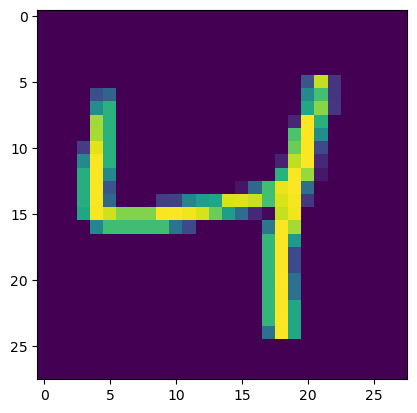

In [4]:
plt.imshow(X_train[2])

In [5]:
y_train[0]

5

In [6]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


(See Part1 for more extensive EDA and detailed info about Min-Max normalization formula simplification.)

In [7]:
# Min-max normalize data
assert X_train.min() == 0   # the following min-max normlization is only effective if the minimum value in the data is zero

# min-max scale from 0 to 1 (as long as original min value was zero)
X_train, X_test = X_train/X_train.max(), X_test/X_train.max()

# Model

**Reminder of model requirements:**

- Use the `Sequential` Model
- Have at least two `Conv2D` layers with all the needed parameters, shapes, number of filters, and activation.
- Have at least two `MaxPooling` layers
- You will need at least `Flatten` Layer and one `Dense` Layer.
- Use the appropriate loss function, optimizer, and metrics.
- Include the first two and last two epoch runs.
- Include a visualization for the Loss over all epochs
- Include a confusion matrix

## Build Model

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28,3,activation='relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2))
])

model.add(layers.Conv2D(36,2,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(10))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 36)        4068      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 36)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1296)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [30]:
# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=["accuracy"],
                 optimizer='adam'
                 )

## Train Model

In [31]:
hist = model.fit(X_train,y_train, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30


2023-11-28 02:55:29.828926: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-28 02:55:29.829457: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-11-28 02:55:29.829525: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_4}}]]
2023-11-28 02:55:29.855494: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-28 02:55:29.855870: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not f

InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_4' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance
      app.start()
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell
      result = self._run_cell(
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell
      result = runner(coro)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_111445/3510862319.py", line 1, in <module>
      hist = model.fit(X_train,y_train, epochs=30, validation_data=(X_test,y_test))
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/engine/training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/optimizers/optimizer.py", line 543, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/optimizers/optimizer.py", line 1174, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/optimizers/optimizer.py", line 650, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/optimizers/optimizer.py", line 1200, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/optimizers/optimizer.py", line 1250, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/keras/optimizers/optimizer.py", line 1245, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_4'
libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_4}}]] [Op:__inference_train_function_36722]